In [0]:
import tensorflow
from tensorflow import keras

## Carregamento dos dados

In [0]:
mnist = keras.datasets.mnist

In [40]:
mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v1/keras/datasets/mnist/__init__.py'>

In [0]:
(imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste) = mnist.load_data()

## Entendendo os dados

In [42]:
imagens_treino[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

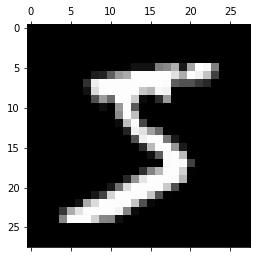

In [43]:
import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(imagens_treino[0]) 
plt.show() 

In [8]:
imagens_treino.shape

(60000, 28, 28)

In [44]:
len(identificacoes_treino)

60000

In [10]:
identificacoes_treino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
identificacoes_treino[0]

5

## Fazendo a rede

In [0]:
modelo_inicial = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_inicial.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
modelo_inicial.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 123us/sample - loss: 2.6234 - acc: 0.9043
Epoch 2/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3442 - acc: 0.9335
Epoch 3/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3005 - acc: 0.9407
Epoch 4/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2713 - acc: 0.9461
Epoch 5/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2411 - acc: 0.9517


In [48]:
print('Métrica inicial')
modelo_inicial.evaluate(imagens_teste, identificacoes_teste)

Métrica inicial
10000/10000 [==============================] - 1s 84us/sample - loss: 0.3213 - acc: 0.9470


[0.3212545937582385, 0.947]

## Normaliza

In [0]:
# normalizacao
imagens_treino_norm, imagens_teste_norm = imagens_treino / 255.0, imagens_teste / 255.0

In [0]:
modelo_norm = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
modelo_norm.fit(imagens_treino_norm, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2013 - acc: 0.9409
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0822 - acc: 0.9749
Epoch 3/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0519 - acc: 0.9839
Epoch 4/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0377 - acc: 0.9879
Epoch 5/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0282 - acc: 0.9906


In [22]:
#perda e acuracia
print("Métrica com normalização")
modelo_norm.evaluate(imagens_teste_norm, identificacoes_teste)

Métrica com normalização
10000/10000 [==============================] - 1s 104us/sample - loss: 0.0760 - acc: 0.9797


[0.07601728629368008, 0.9797]

## Adiciona dropout

In [0]:
modelo_drop = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
modelo_drop.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/sample - loss: 2.6960 - acc: 0.8757
Epoch 2/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4338 - acc: 0.9071
Epoch 3/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.4088 - acc: 0.9098
Epoch 4/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3958 - acc: 0.9133
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3687 - acc: 0.9170


In [56]:
print('Métrica com normalização e dropout')
modelo_drop.evaluate(imagens_teste, identificacoes_teste)

Métrica com normalização e dropout
10000/10000 [==============================] - 1s 60us/sample - loss: 0.3041 - acc: 0.9400


[0.3041039045731173, 0.94]

## Normalizacao + dropout

In [0]:
modelo_norm_drop = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_norm_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
modelo_norm_drop.fit(imagens_treino_norm, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2171 - acc: 0.9357
Epoch 2/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0973 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0680 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0538 - acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0444 - acc: 0.9856


In [29]:
print('Métrica com normalização e dropout')
modelo_norm_drop.evaluate(imagens_teste_norm, identificacoes_teste)

Métrica com normalização e dropout
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0718 - acc: 0.9794


[0.0718162722389563, 0.9794]

## Salva modelo

In [0]:
modelo_norm_drop.save('modelo_norm_drop_digitos.h5')

In [0]:
from tensorflow.keras.models import load_model

modelo_norm_drop_salvo = load_model('modelo_norm_drop_digitos.h5')

In [62]:
import numpy as np

resultado_modelo_norm_drop = modelo_norm_drop.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(resultado_modelo_norm_drop[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste modelo salvo: 2
número da imagem de teste: 2
